<a href="https://colab.research.google.com/github/rlarjsdn4505/first-repository/blob/master/%EC%84%9C%EB%B3%84%204%EB%B2%88%20%EA%B0%80%EC%84%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
df1 = pd.read_csv('/df1.csv')

In [ ]:
df1.columns

Index(['Ï£ºÎ¨∏ID', 'Î¶¨Î∑∞ID', 'Î¶¨Î∑∞Ï†êÏàò', 'Î¶¨Î∑∞ÏûëÏÑ±Ïùº', 'Ï£ºÎ¨∏ÏÉÅÌÉú', 'Íµ¨Îß§ÏùºÏãú', 'Ïã§Ï†úÎ∞∞ÏÜ°Ïùº', 'ÏòàÏÉÅÎ∞∞ÏÜ°Ïùº',
       'Í≥†Í∞ùÍ≥†Ïú†ID', 'Í≥†Í∞ùÏö∞Ìé∏Î≤àÌò∏ÏïûÏûêÎ¶¨', 'Í≥†Í∞ùÎèÑÏãú', 'Í≥†Í∞ùÏ£º', 'Ï£ºÎ¨∏Í∞úÏàò', 'ÏÉÅÌíàÍ∞ÄÍ≤©Ìï©Í≥Ñ', 'Î∞∞ÏÜ°ÎπÑÌï©Í≥Ñ',
       'ÏÉÅÌíàÏπ¥ÌÖåÍ≥†Î¶¨', 'Í≤∞Ï†úÍ∏àÏï°(Ï£ºÎ¨∏Ìï©)', 'Ï¥ùÍ≤∞Ï†úÍ∏àÏï°', 'Î∞∞ÏÜ°ÏßÄÏó∞ÏùºÏàò', 'Î∞∞ÏÜ°ÏßÄÏó∞Ïó¨Î∂Ä'],
      dtype='object')

# 1

In [ ]:
import os
font_path = '/NanumGothic.ttf'
print('exists:', os.path.exists(font_path), 'cwd:', os.getcwd())

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

fm._load_fontmanager(try_read_cache=False)

fm.fontManager.addfont(font_path)
prop = fm.FontProperties(fname=font_path)
family_name = prop.get_name()
print('detected family:', family_name)
mpl.rcParams['font.family'] = family_name
mpl.rcParams['axes.unicode_minus'] = False

exists: True cwd: /content
detected family: NanumGothic


In [ ]:
# Í≥†Í∞ùÎ≥Ñ Ï£ºÎ¨∏ ÌöüÏàò Í≥ÑÏÇ∞
df1['Í≥†Í∞ù_Ï£ºÎ¨∏ÌöüÏàò'] = df1.groupby('Í≥†Í∞ùÍ≥†Ïú†ID')['Ï£ºÎ¨∏ID'].transform('nunique')

# Ïû¨Íµ¨Îß§ Ïó¨Î∂Ä (0=Ïã†Í∑ú, 1=Ïû¨Íµ¨Îß§)
df1['Ïû¨Íµ¨Îß§Ïó¨Î∂Ä'] = (df1['Í≥†Í∞ù_Ï£ºÎ¨∏ÌöüÏàò'] > 1).astype(int)

df1[['Í≥†Í∞ùÍ≥†Ïú†ID','Ï£ºÎ¨∏ID','Í≥†Í∞ù_Ï£ºÎ¨∏ÌöüÏàò','Ïû¨Íµ¨Îß§Ïó¨Î∂Ä']].head(10)

Í≥†Í∞ùÍ≥†Ïú†ID                              Ï£ºÎ¨∏ID  \
0  871766c5855e863f6eccc05f988b23cb  00010242fe8c5a6d1ba2dd792cb16214   
1  eb28e67c4c0b83846050ddfb8a35d051  00018f77f2f0320c557190d7a144bdd3   
2  3818d81c6709e39d06b2738a8d3a2474  000229ec398224ef6ca0657da4fc703e   
3  af861d436cfc08b2c2ddefd0ba074622  00024acbcdf0a6daa1e931b038114c75   
4  64b576fb70d441e8f1b2d7d446e483c5  00042b26cf59d7ce69dfabb4e55b4fd9   
5  85c835d128beae5b4ce8602c491bf385  00048cc3ae777c65dbb7d2a0634bc1ea   
6  635d9ac1680f03288e72ada3a1035803  00054e8431b9d7675808bcb819fb4a32   
7  639d23421f5517f69d0c3d6e6564cf0e  0005a1a1728c9d785b8e2b08b904576c   
8  0782c41380992a5a533489063df0eef6  0005f50442cb953dcd1d21e1fb923495   
9  107e6259485efac66428a56f10801f4f  00061f2a7bc09da83e415a52dc8a4af1   

   Í≥†Í∞ù_Ï£ºÎ¨∏ÌöüÏàò  Ïû¨Íµ¨Îß§Ïó¨Î∂Ä  
0        1      0  
1        2      1  
2        1      0  
3        1      0  
4        1      0  
5        1      0  
6        1      0  
7        1      0  
8        1      0  
9        1      0

In [ ]:
# Ïã†Í∑ú vs Ïû¨Íµ¨Îß§ ÌèâÍ∑† Ï†êÏàò ÎπÑÍµê
mean_scores = df1.groupby('Ïû¨Íµ¨Îß§Ïó¨Î∂Ä')['Î¶¨Î∑∞Ï†êÏàò'].mean()
count_scores = df1.groupby('Ïû¨Íµ¨Îß§Ïó¨Î∂Ä')['Î¶¨Î∑∞Ï†êÏàò'].count()

print("ÌèâÍ∑† Î¶¨Î∑∞Ï†êÏàò:\n", mean_scores)
print("ÏÉòÌîå Ïàò:\n", count_scores)

ÌèâÍ∑† Î¶¨Î∑∞Ï†êÏàò:
 Ïû¨Íµ¨Îß§Ïó¨Î∂Ä
0    4.236247
1    4.326241
Name: Î¶¨Î∑∞Ï†êÏàò, dtype: float64
ÏÉòÌîå Ïàò:
 Ïû¨Íµ¨Îß§Ïó¨Î∂Ä
0    78600
1     3948
Name: Î¶¨Î∑∞Ï†êÏàò, dtype: int64


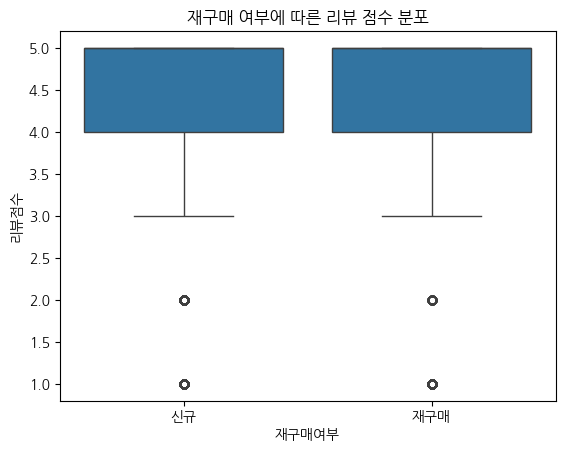

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Ïû¨Íµ¨Îß§Ïó¨Î∂Ä', y='Î¶¨Î∑∞Ï†êÏàò', data=df1)
plt.xticks([0,1], ['Ïã†Í∑ú', 'Ïû¨Íµ¨Îß§'])
plt.title("Ïû¨Íµ¨Îß§ Ïó¨Î∂ÄÏóê Îî∞Î•∏ Î¶¨Î∑∞ Ï†êÏàò Î∂ÑÌè¨")
plt.show()

In [ ]:
from scipy.stats import ttest_ind

new_customers = df1.loc[df1['Ïû¨Íµ¨Îß§Ïó¨Î∂Ä']==0, 'Î¶¨Î∑∞Ï†êÏàò'].dropna()
repeat_customers = df1.loc[df1['Ïû¨Íµ¨Îß§Ïó¨Î∂Ä']==1, 'Î¶¨Î∑∞Ï†êÏàò'].dropna()

t_stat, p_val = ttest_ind(new_customers, repeat_customers, equal_var=False)

print("Ïã†Í∑ú ÌèâÍ∑†:", new_customers.mean())
print("Ïû¨Íµ¨Îß§ ÌèâÍ∑†:", repeat_customers.mean())
print("t-ÌÜµÍ≥ÑÎüâ:", t_stat, "p-Í∞í:", p_val)

Ïã†Í∑ú ÌèâÍ∑†: 4.236246819338422
Ïû¨Íµ¨Îß§ ÌèâÍ∑†: 4.326241134751773
t-ÌÜµÍ≥ÑÎüâ: -4.782150582527931 p-Í∞í: 1.7911022996172908e-06


 "Ïû¨Íµ¨Îß§ Í≥†Í∞ùÏù¥ Ïã†Í∑ú Í≥†Í∞ùÎ≥¥Îã§ ÌèâÍ∑† Î¶¨Î∑∞ Ï†êÏàòÍ∞Ä ÌÜµÍ≥ÑÏ†ÅÏúºÎ°úÎäî Ïú†ÏùòÎØ∏ÌïòÍ≤å ÎÜíÏïòÏßÄÎßå, Ïã§Ï†ú Ï†êÏàò Ï∞®Ïù¥Îäî ÏïΩ 0.1Ï†ê ÏàòÏ§ÄÏúºÎ°ú ÌÅ¨ÏßÄ ÏïäÏïòÎã§."

 "Ï¶â, Ïû¨Íµ¨Îß§ Í≥†Í∞ùÏù¥ Ï°∞Í∏à Îçî Í∏çÏ†ïÏ†ÅÏúºÎ°ú ÌèâÍ∞ÄÌïòÎäî Í≤ΩÌñ•ÏùÄ ÏûàÏúºÎÇò, Ïã§Î¨¥Ï†ÅÏúºÎ°ú ÌÅ∞ Ï∞®Ïù¥ÎùºÍ≥† Î≥¥Í∏∞Îäî Ïñ¥Î†µÎã§."

In [ ]:
import numpy as np

mean_diff = repeat_customers.mean() - new_customers.mean()
pooled_std = np.sqrt(((new_customers.std()**2) + (repeat_customers.std()**2)) / 2)
cohens_d = mean_diff / pooled_std

print("ÌèâÍ∑† Ï∞®Ïù¥:", mean_diff)
print("Cohen's d:", cohens_d)

ÌèâÍ∑† Ï∞®Ïù¥: 0.08999431541335046
Cohen's d: 0.07644124444487689


‚úÖ Ï¢ÖÌï©Ï†ÅÏúºÎ°ú

ÌÜµÍ≥ÑÏ†ÅÏúºÎ°úÎäî pÍ∞íÏù¥ ÏûëÏïÑÏÑú Ï∞®Ïù¥Í∞Ä Ïú†ÏùòÌïòÎã§Í≥† ÎÇòÏò§ÏßÄÎßå,

Ïã§Ï†ú Ìö®Í≥º ÌÅ¨Í∏∞(Cohen‚Äôs d)Îäî 0.076 ‚Üí ÏÇ¨Ïã§ÏÉÅ Î¨¥ÏãúÌï¥ÎèÑ Îê† Ï†ïÎèÑÏùò Ï∞®Ïù¥ÎùºÎäî Îúª

Ïû¨Íµ¨Îß§ Í≥†Í∞ùÍ≥º Ïã†Í∑ú Í≥†Í∞ùÏùò Î¶¨Î∑∞ Ï†êÏàòÎäî ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Î•º Î≥¥ÏòÄÏúºÎÇò (p < 0.001), ÌèâÍ∑† Ï∞®Ïù¥Îäî ÏïΩ 0.09Ï†êÏóê Î∂àÍ≥ºÌñàÍ≥† Ìö®Í≥º ÌÅ¨Í∏∞(Cohen‚Äôs d=0.076)Îäî Îß§Ïö∞ ÏûëÏùå. Îî∞ÎùºÏÑú Ïã§Î¨¥Ï†ÅÏúºÎ°úÎäî ÌÅ∞ Ï∞®Ïù¥ÎùºÍ≥† Î≥¥Í∏∞ Ïñ¥Î†§ÏõÄ.

In [ ]:
state_mean = df1.groupby('Í≥†Í∞ùÏ£º')['Î¶¨Î∑∞Ï†êÏàò'].mean().sort_values(ascending=False)
city_mean = df1.groupby('Í≥†Í∞ùÎèÑÏãú')['Î¶¨Î∑∞Ï†êÏàò'].mean().sort_values(ascending=False)

print("Ï£ºÎ≥Ñ ÌèâÍ∑† Î¶¨Î∑∞Ï†êÏàò:\n", state_mean.head(10))
print("ÎèÑÏãúÎ≥Ñ ÌèâÍ∑† Î¶¨Î∑∞Ï†êÏàò:\n", city_mean.head(10))

Ï£ºÎ≥Ñ ÌèâÍ∑† Î¶¨Î∑∞Ï†êÏàò:
 Í≥†Í∞ùÏ£º
AM    4.356436
PR    4.292683
SP    4.292439
RN    4.285326
RS    4.275452
MS    4.264151
MT    4.262794
MG    4.241908
RO    4.230337
PE    4.223005
Name: Î¶¨Î∑∞Ï†êÏàò, dtype: float64
ÎèÑÏãúÎ≥Ñ ÌèâÍ∑† Î¶¨Î∑∞Ï†êÏàò:
 Í≥†Í∞ùÎèÑÏãú
abaira                     5.0
xapuri                     5.0
abadia dos dourados        5.0
abdon batista              5.0
vitoria das missoes        5.0
espirito santo do turvo    5.0
esplanada                  5.0
estevao de araujo          5.0
estiva                     5.0
estrela d oeste            5.0
Name: Î¶¨Î∑∞Ï†êÏàò, dtype: float64


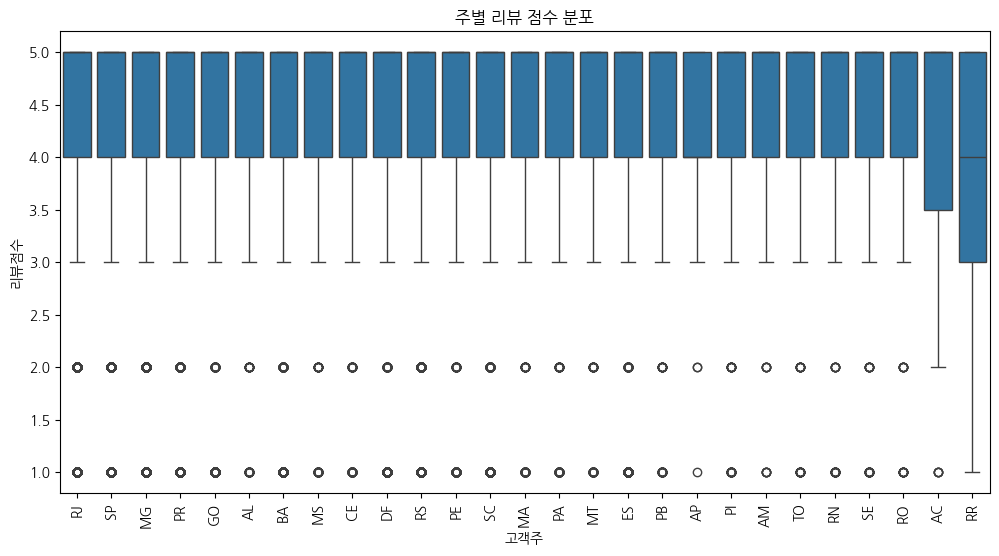

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.boxplot(x='Í≥†Í∞ùÏ£º', y='Î¶¨Î∑∞Ï†êÏàò', data=df1)
plt.xticks(rotation=90)
plt.title("Ï£ºÎ≥Ñ Î¶¨Î∑∞ Ï†êÏàò Î∂ÑÌè¨")
plt.show()

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ï£ºÎ≥Ñ Ï†êÏàò Ï∞®Ïù¥
anova = ols("Î¶¨Î∑∞Ï†êÏàò ~ C(Í≥†Í∞ùÏ£º)", data=df1).fit()
anova_table = sm.stats.anova_lm(anova, typ=2)
print(anova_table)

                 sum_sq       df          F        PR(>F)
C(Í≥†Í∞ùÏ£º)       407.111845     26.0  10.899118  5.341075e-45
Residual  118553.267898  82521.0        NaN           NaN


Í≥†Í∞ùÏ£º
AM    4.356436
PR    4.292683
SP    4.292439
RN    4.285326
RS    4.275452
MS    4.264151
MT    4.262794
MG    4.241908
RO    4.230337
PE    4.223005
SC    4.222442
DF    4.197137
GO    4.183038
CE    4.182371
AP    4.170213
ES    4.166473
PI    4.162921
TO    4.146667
RJ    4.145714
PB    4.130208
SE    4.117188
PA    4.086580
AL    4.066007
BA    4.039119
MA    4.019504
AC    4.018182
RR    3.850000
Name: Î¶¨Î∑∞Ï†êÏàò, dtype: float64


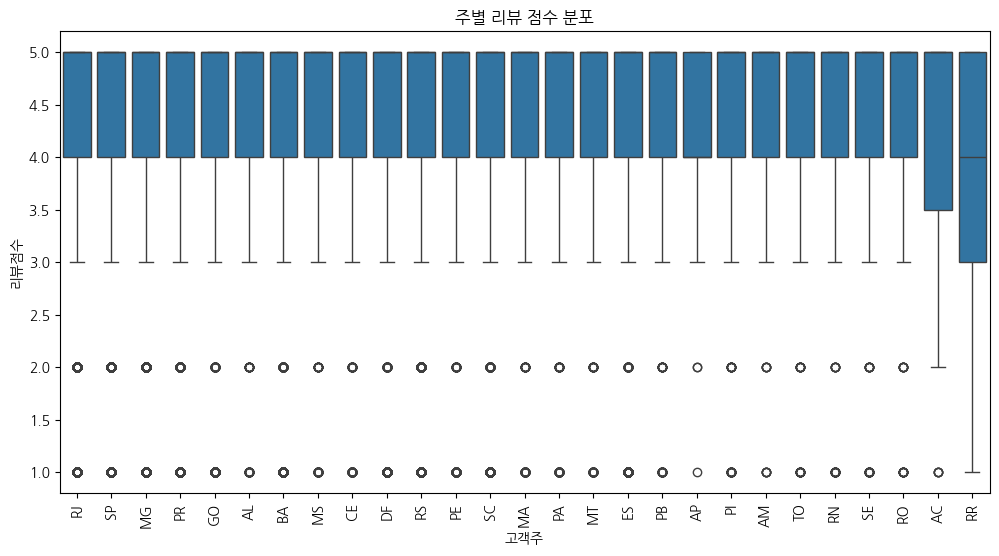

                 sum_sq       df          F        PR(>F)
C(Í≥†Í∞ùÏ£º)       407.111845     26.0  10.899118  5.341075e-45
Residual  118553.267898  82521.0        NaN           NaN


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ï£ºÎ≥Ñ ÌèâÍ∑† Î¶¨Î∑∞ Ï†êÏàò
state_mean = df1.groupby('Í≥†Í∞ùÏ£º')['Î¶¨Î∑∞Ï†êÏàò'].mean().sort_values(ascending=False)
print(state_mean)

# Î∞ïÏä§ÌîåÎ°Ø
plt.figure(figsize=(12,6))
sns.boxplot(x='Í≥†Í∞ùÏ£º', y='Î¶¨Î∑∞Ï†êÏàò', data=df1)
plt.xticks(rotation=90)
plt.title("Ï£ºÎ≥Ñ Î¶¨Î∑∞ Ï†êÏàò Î∂ÑÌè¨")
plt.show()

# ANOVA Í≤ÄÏ†ï
anova = ols("Î¶¨Î∑∞Ï†êÏàò ~ C(Í≥†Í∞ùÏ£º)", data=df1).fit()
anova_table = sm.stats.anova_lm(anova, typ=2)
print(anova_table)

In [ ]:
import pandas as pd
import numpy as np

state_stats = (
    df1.groupby('Í≥†Í∞ùÏ£º')['Î¶¨Î∑∞Ï†êÏàò']
      .agg(n='count', mean='mean', std='std')
      .assign(se=lambda x: x['std']/np.sqrt(x['n']))  # ÌëúÏ§ÄÏò§Ï∞®
      .sort_values('mean', ascending=False)
      .round(3)
)
state_stats.head(15)   # TOP 15Îßå Î®ºÏ†Ä Î≥¥Í∏∞ (ÎòêÎäî Ï†ÑÏ≤¥)

n   mean    std     se
Í≥†Í∞ùÏ£º                            
AM     101  4.356  1.101  0.110
PR    4305  4.293  1.153  0.018
SP   36093  4.292  1.158  0.006
RN     368  4.285  1.147  0.060
RS    4538  4.275  1.161  0.017
MS     583  4.264  1.188  0.049
MT     723  4.263  1.156  0.043
MG    9855  4.242  1.199  0.012
RO     178  4.230  1.206  0.090
PE    1278  4.223  1.225  0.034
SC    3030  4.222  1.203  0.022
DF    1816  4.197  1.243  0.029
GO    1639  4.183  1.215  0.030
CE     987  4.182  1.198  0.038
AP      47  4.170  0.963  0.140

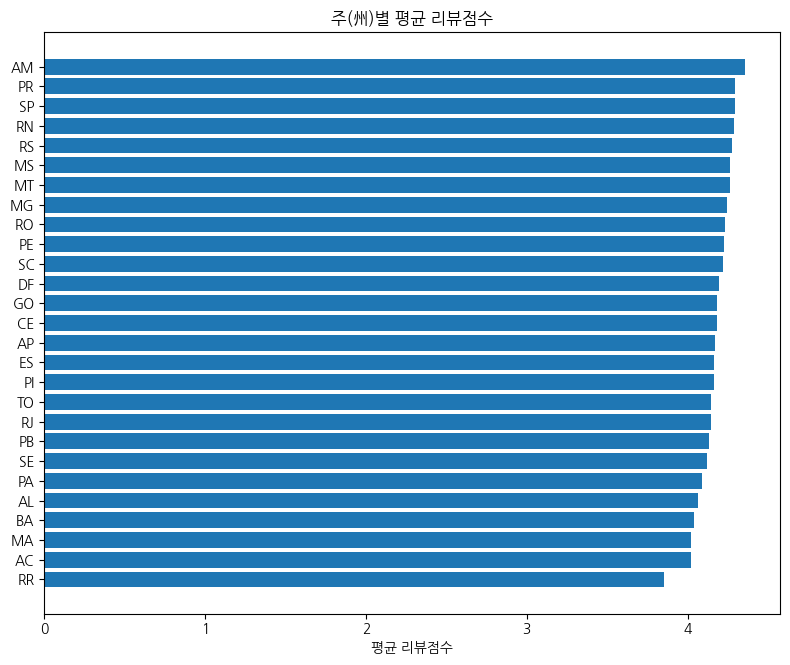

In [ ]:
import matplotlib.pyplot as plt

top = state_stats.copy().sort_values('mean')  # ÎÇÆ‚ÜíÎÜí Ï†ïÎ†¨
plt.figure(figsize=(8, max(4, len(top)*0.25)))
plt.barh(top.index, top['mean'])
plt.xlabel('ÌèâÍ∑† Î¶¨Î∑∞Ï†êÏàò')
plt.title('Ï£º(Â∑û)Î≥Ñ ÌèâÍ∑† Î¶¨Î∑∞Ï†êÏàò')
plt.tight_layout(); plt.show()

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# ANOVA: ÏßÄÏó≠ Í∞Ñ ÌèâÍ∑† Ï∞®Ïù¥ Ï°¥Ïû¨ Ïó¨Î∂Ä
anova = ols("Î¶¨Î∑∞Ï†êÏàò ~ C(Í≥†Í∞ùÏ£º)", data=df1).fit()
print(sm.stats.anova_lm(anova, typ=2))

# Tukey HSD: Ïñ¥Îñ§ ÏßÄÏó≠Îì§ÎÅºÎ¶¨ Ï∞®Ïù¥Í∞Ä ÎÇòÎäîÏßÄ
tk = pairwise_tukeyhsd(endog=df1['Î¶¨Î∑∞Ï†êÏàò'], groups=df1['Í≥†Í∞ùÏ£º'], alpha=0.05)
print(tk.summary())


                 sum_sq       df          F        PR(>F)
C(Í≥†Í∞ùÏ£º)       407.111845     26.0  10.899118  5.341075e-45
Residual  118553.267898  82521.0        NaN           NaN
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    AC     AL   0.0478    1.0 -0.6016 0.6972  False
    AC     AM   0.3383 0.9967 -0.4042 1.0807  False
    AC     AP    0.152    1.0 -0.7281 1.0321  False
    AC     BA   0.0209    1.0 -0.5827 0.6246  False
    AC     CE   0.1642    1.0 -0.4497  0.778  False
    AC     DF    0.179    1.0 -0.4275 0.7854  False
    AC     ES   0.1483    1.0 -0.4586 0.7552  False
    AC     GO   0.1649    1.0 -0.4425 0.7722  False
    AC     MA   0.0013    1.0 -0.6246 0.6272  False
    AC     MG   0.2237 0.9999 -0.3754 0.8228  False
    AC     MS    0.246 0.9997  -0.379 0.8709  False
    AC     MT   0.2446 0.9997 -0.3751 0.8644  False
    AC     PA   0.0684    1.0 -0.5523 0.

Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú ANOVAÏóêÏÑú ÏßÄÏó≠ Ï∞®Ïù¥Îäî Ïú†ÏùòÌïòÎã§.

ÎåÄÎ∂ÄÎ∂ÑÏùò Ï£º ÏåçÏóêÏÑúÎäî Ï∞®Ïù¥Í∞Ä ÏóÜÏßÄÎßå, ÏùºÎ∂Ä ÌäπÏ†ï Ï£º(= reject=True)ÏóêÏÑúÎäî Ïú†ÏùòÌïú Ï∞®Ïù¥Í∞Ä ÌôïÏù∏ÎêòÏóàÎã§.

Ï∞®Ïù¥Í∞Ä ÎÇú Ï£ºÎì§ÎÅºÎ¶¨Ïùò ÌèâÍ∑† Î¶¨Î∑∞ Ï†êÏàò Ï∞®Ïù¥Îäî Ïã§Ï†úÎ°ú Î™á Ï†êÏù∏ÏßÄ ÌôïÏù∏Ìï¥Ïïº Ìï® ‚Üí
Ïòà: "Î∂ÅÎ∂Ä ÏßÄÏó≠(AC, AM)Í≥º ÎÇ®ÎèôÎ∂Ä ÏßÄÏó≠(SP, RJ) Í∞ÑÏóê ÌèâÍ∑† Î¶¨Î∑∞ Ï†êÏàò Ï∞®Ïù¥Í∞Ä ÏïΩ 0.3~0.4Ï†ê Ï°¥Ïû¨ÌñàÎã§."

Îã§Îßå, 5Ï†ê ÎßåÏ†ê Í∏∞Ï§ÄÏóêÏÑú 0.3Ï†ê Ï∞®Ïù¥ÎùºÎ©¥ "Ïã§Î¨¥Ï†ÅÏúºÎ°ú ÌÅ∞ Ï∞®Ïù¥Îäî ÏïÑÎãàÎã§" ÎùºÍ≥† Ìï¥ÏÑùÌï† Ïàò ÏûàÏùå.

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd

# Tukey HSD Îã§Ïãú Ïã§Ìñâ (Ïù¥ÎØ∏ ÌñàÎã§Î©¥ Í≤∞Í≥º Í∞ùÏ≤¥Î•º Í∑∏ÎåÄÎ°ú Ïç®ÎèÑ Îê®)
tukey = pairwise_tukeyhsd(endog=df1['Î¶¨Î∑∞Ï†êÏàò'],
                          groups=df1['Í≥†Í∞ùÏ£º'],
                          alpha=0.05)

# Í≤∞Í≥ºÎ•º DataFrameÏúºÎ°ú Î≥ÄÌôò
tukey_df = pd.DataFrame(data=tukey.summary().data[1:],  # Ï≤´ Ï§ÑÏùÄ headerÎùº Ï†úÏô∏
                        columns=tukey.summary().data[0])

# reject=TrueÎßå ÌïÑÌÑ∞ÎßÅ
significant = tukey_df[tukey_df['reject'] == True]

print(significant)

    group1 group2  meandiff   p-adj   lower   upper  reject
99      BA     DF    0.1580  0.0045  0.0229  0.2932    True
101     BA     GO    0.1439  0.0330  0.0045  0.2833    True
103     BA     MG    0.2028  0.0000  0.1056  0.3000    True
104     BA     MS    0.2250  0.0113  0.0222  0.4278    True
105     BA     MT    0.2237  0.0027  0.0376  0.4097    True
108     BA     PE    0.1839  0.0021  0.0328  0.3349    True
110     BA     PR    0.2536  0.0000  0.1439  0.3632    True
111     BA     RJ    0.1066  0.0137  0.0093  0.2039    True
115     BA     RS    0.2363  0.0000  0.1278  0.3449    True
116     BA     SC    0.1833  0.0000  0.0653  0.3014    True
118     BA     SP    0.2533  0.0000  0.1639  0.3428    True
178     ES     SP    0.1260  0.0060  0.0166  0.2354    True
198     MA     MG    0.2224  0.0053  0.0306  0.4142    True
205     MA     PR    0.2732  0.0001  0.0748  0.4716    True
210     MA     RS    0.2559  0.0006  0.0581  0.4538    True
213     MA     SP    0.2729  0.0000  0.0

Ï∞®Ïù¥Í∞Ä Ïú†ÏùòÎØ∏Ìïú Ï£º(Â∑û) Ï°∞Ìï©Îßå ÎÇ®Ïùå
‚Üí Ï†ÑÏ≤¥ ÎπÑÍµêÏóêÏÑú Ïú†ÏùòÌïòÏßÄ ÏïäÏùÄ Î∂ÄÎ∂ÑÏùÄ Í±∏Îü¨Ï°åÏùå.

meandiff Î∂ÄÌò∏

ÏñëÏàò(+) ‚Üí group1 ÌèâÍ∑† Ï†êÏàòÍ∞Ä Îçî ÎÜíÏùå

ÏùåÏàò(-) ‚Üí group2 ÌèâÍ∑† Ï†êÏàòÍ∞Ä Îçî ÎÜíÏùå

Ï£ºÏöî Ìå®ÌÑ¥

Bahia(BA)ÏôÄ Ïó¨Îü¨ Ï£º(DF, GO, MG, MS, MT, PE, PR, RS, SP Îì±)ÏóêÏÑú Í≥ÑÏÜç Ïú†ÏùòÌïú Ï∞®Ïù¥Í∞Ä ÎÇòÌÉÄÎÇ®.

RJÏôÄ Îã§Î•∏ Ï£º(PR, SP)ÏóêÏÑúÎèÑ Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä Î≥¥ÏûÑ.

Îî∞ÎùºÏÑú ÌäπÏ†ï Ï£º(BA, RJ Îì±)Îäî Í≥†Í∞ù Î¶¨Î∑∞ Ï†êÏàòÍ∞Ä Îã§Î•∏ ÏßÄÏó≠Í≥º ÎöúÎ†∑ÌïòÍ≤å Îã§Î•¥Îã§Í≥† ÎßêÌï† Ïàò ÏûàÏùå.

Ïú†Ïùò ÏåçÎßå Ï∂îÎ†§ÏÑú **Ìö®Í≥ºÌÅ¨Í∏∞(Cohen‚Äôs d)**ÍπåÏßÄ

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd
import numpy as np

# 1) Tukey Í≤∞Í≥º ‚Üí DF
tukey = pairwise_tukeyhsd(endog=df1['Î¶¨Î∑∞Ï†êÏàò'], groups=df1['Í≥†Í∞ùÏ£º'], alpha=0.05)
tukey_df = pd.DataFrame(tukey.summary().data[1:], columns=tukey.summary().data[0])

# 2) Ïú†ÏùòÌïú ÏåçÎßå
sig = tukey_df[tukey_df['reject'] == True].copy()

# 3) Cohen's d Í≥ÑÏÇ∞ Ìï®Ïàò (Îëê ÏßÄÏó≠ Í∞Ñ)
def cohens_d_2groups(g1, g2):
    a = df1.loc[df1['Í≥†Í∞ùÏ£º']==g1, 'Î¶¨Î∑∞Ï†êÏàò'].dropna()
    b = df1.loc[df1['Í≥†Í∞ùÏ£º']==g2, 'Î¶¨Î∑∞Ï†êÏàò'].dropna()
    pooled = np.sqrt(((a.var(ddof=1) + b.var(ddof=1)) / 2))
    return (a.mean() - b.mean()) / pooled, len(a), len(b)

sig[['cohens_d','n1','n2']] = sig.apply(
    lambda r: pd.Series(cohens_d_2groups(r['group1'], r['group2'])),
    axis=1
)

# 4) Ïã§Î¨¥Ï†Å ÌÅ¨Í∏∞ ÏàúÏúºÎ°ú Ï†ïÎ†¨
sig['abs_diff'] = sig['meandiff'].astype(float).abs()
sig = sig.sort_values(['abs_diff'], ascending=False)

# ==> sig: (group1, group2, meandiff, p-adj, CI, cohens_d, n1, n2, abs_diff)
sig.head(20)

group1 group2  meandiff   p-adj   lower   upper  reject  cohens_d      n1  \
205     MA     PR    0.2732  0.0001  0.0748  0.4716    True -0.220956   564.0   
213     MA     SP    0.2729  0.0000  0.0849  0.4610    True -0.220379   564.0   
210     MA     RS    0.2559  0.0006  0.0581  0.4538    True -0.206404   564.0   
110     BA     PR    0.2536  0.0000  0.1439  0.3632    True -0.205176  2633.0   
118     BA     SP    0.2533  0.0000  0.1639  0.3428    True -0.204627  2633.0   
115     BA     RS    0.2363  0.0000  0.1278  0.3449    True -0.190665  2633.0   
104     BA     MS    0.2250  0.0113  0.0222  0.4278    True -0.179695  2633.0   
105     BA     MT    0.2237  0.0027  0.0376  0.4097    True -0.180814  2633.0   
198     MA     MG    0.2224  0.0053  0.0306  0.4142    True -0.176762   564.0   
263     PA     PR    0.2061  0.0075  0.0248  0.3875    True -0.169733   693.0   
271     PA     SP    0.2059  0.0023  0.0359  0.3758    True -0.169230   693.0   
103     BA     MG    0.2028  0.0000  0.1056  0.3000    True -0.161238  2633.0   
268     PA     RS    0.1889  0.0279  0.0082  0.3696    True -0.155064   693.0   
108     BA     PE    0.1839  0.0021  0.0328  0.3349    True -0.144769  2633.0   
116     BA     SC    0.1833  0.0000  0.0653  0.3014    True -0.145583  2633.0   
99      BA     DF    0.1580  0.0045  0.0229  0.2932    True -0.123561  2633.0   
306     PR     RJ   -0.1470  0.0000 -0.2280 -0.0660    True  0.119294  4305.0   
321     RJ     SP    0.1467  0.0000  0.0963  0.1972    True -0.118890  9800.0   
101     BA     GO    0.1439  0.0330  0.0045  0.2833    True -0.113740  2633.0   
318     RJ     RS    0.1297  0.0000  0.0502  0.2093    True -0.104993  9800.0   

          n2  abs_diff  
205   4305.0    0.2732  
213  36093.0    0.2729  
210   4538.0    0.2559  
110   4305.0    0.2536  
118  36093.0    0.2533  
115   4538.0    0.2363  
104    583.0    0.2250  
105    723.0    0.2237  
198   9855.0    0.2224  
263   4305.0    0.2061  
271  36093.0    0.2059  
103   9855.0    0.2028  
268   4538.0    0.1889  
108   1278.0    0.1839  
116   3030.0    0.1833  
99    1816.0    0.1580  
306   9800.0    0.1470  
321  36093.0    0.1467  
101   1639.0    0.1439  
318   4538.0    0.1297

ÍµêÎûÄÏöîÏù∏(Î∞∞ÏÜ°/Í∞ÄÍ≤©/Ïû¨Íµ¨Îß§ Îì±) Î≥¥Ï†ï ÌõÑ ÏßÄÏó≠Ï∞® ÌôïÏù∏

adj_state: Îã§Î•∏ ÏöîÏù∏Îì§ÏùÑ ÎèôÏùºÌïú ÏàòÏ§ÄÏúºÎ°ú ÎßûÏ∑ÑÏùÑ Îïå ÏßÄÏó≠ ÏûêÏ≤¥ Ìö®Í≥ºÎßå ÎÇ®Í∏¥ ÌèâÍ∑†Í≥º 95% CI.

Î≥¥Ï†ï Ï†Ñ(top A)Í≥º ÏàúÏúÑÍ∞Ä Îã§Î•¥Î©¥ ‚Üí ÌòºÌï©Ìö®Í≥º(ÏßÄÏó∞/Í∞ÄÍ≤©/Ïû¨Íµ¨Îß§ Î∂ÑÌè¨)Í∞Ä ÏòÅÌñ•.

In [ ]:
import statsmodels.formula.api as smf

# 1) ÌöåÍ∑ÄÎ°ú Î≥¥Ï†ï (Í∞ïÍ±¥ÌëúÏ§ÄÏò§Ï∞®)
model = smf.ols(
    "Î¶¨Î∑∞Ï†êÏàò ~ C(Í≥†Í∞ùÏ£º) + Î∞∞ÏÜ°ÏßÄÏó∞ÏùºÏàò + Ï¥ùÍ≤∞Ï†úÍ∏àÏï° + Î∞∞ÏÜ°ÎπÑÌï©Í≥Ñ + Ïû¨Íµ¨Îß§Ïó¨Î∂Ä",
    data=df1
).fit(cov_type='HC3')
print(model.summary())

# 2) ‚ÄòÎ≥¥Ï†ïÎêú ÏßÄÏó≠Î≥Ñ ÏòàÏ∏°ÌèâÍ∑†‚Äô(LS-mean ÎäêÎÇå) Íµ¨ÌïòÍ∏∞
cov_means = {
    'Î∞∞ÏÜ°ÏßÄÏó∞ÏùºÏàò': df1['Î∞∞ÏÜ°ÏßÄÏó∞ÏùºÏàò'].mean(),
    'Ï¥ùÍ≤∞Ï†úÍ∏àÏï°':   df1['Ï¥ùÍ≤∞Ï†úÍ∏àÏï°'].mean(),
    'Î∞∞ÏÜ°ÎπÑÌï©Í≥Ñ':   df1['Î∞∞ÏÜ°ÎπÑÌï©Í≥Ñ'].mean(),
    'Ïû¨Íµ¨Îß§Ïó¨Î∂Ä':   df1['Ïû¨Íµ¨Îß§Ïó¨Î∂Ä'].mean()
}
states = sorted(df1['Í≥†Í∞ùÏ£º'].dropna().unique())
at = pd.DataFrame({'Í≥†Í∞ùÏ£º': states, **cov_means})
pred = model.get_prediction(at).summary_frame(alpha=0.05)
adj_state = at.join(pred[['mean','mean_ci_lower','mean_ci_upper']])
adj_state = adj_state.sort_values('mean', ascending=False)
adj_state.head(15)

                            OLS Regression Results                            
Dep. Variable:                   Î¶¨Î∑∞Ï†êÏàò   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     93.07
Date:                Tue, 19 Aug 2025   Prob (F-statistic):               0.00
Time:                        03:23:18   Log-Likelihood:            -1.3024e+05
No. Observations:               82548   AIC:                         2.605e+05
Df Residuals:                   82517   BIC:                         2.608e+05
Df Model:                          30                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.7347      0.175     2

Í≥†Í∞ùÏ£º    Î∞∞ÏÜ°ÏßÄÏó∞ÏùºÏàò       Ï¥ùÍ≤∞Ï†úÍ∏àÏï°      Î∞∞ÏÜ°ÎπÑÌï©Í≥Ñ     Ïû¨Íµ¨Îß§Ïó¨Î∂Ä      mean  mean_ci_lower  \
19  RN  11.09936  134.347627  19.573702  0.047827  4.353635       4.242115   
2   AM  11.09936  134.347627  19.573702  0.047827  4.318398       4.089775   
11  MS  11.09936  134.347627  19.573702  0.047827  4.308968       4.216629   
25  SP  11.09936  134.347627  19.573702  0.047827  4.290040       4.277524   
26  TO  11.09936  134.347627  19.573702  0.047827  4.286958       4.136267   
16  PI  11.09936  134.347627  19.573702  0.047827  4.283895       4.162583   
17  PR  11.09936  134.347627  19.573702  0.047827  4.262488       4.228344   
5   CE  11.09936  134.347627  19.573702  0.047827  4.255283       4.182557   
15  PE  11.09936  134.347627  19.573702  0.047827  4.252853       4.186954   
23  SC  11.09936  134.347627  19.573702  0.047827  4.247469       4.205937   
1   AL  11.09936  134.347627  19.573702  0.047827  4.246744       4.108234   
12  MT  11.09936  134.347627  19.573702  0.047827  4.241424       4.158065   
22  RS  11.09936  134.347627  19.573702  0.047827  4.231264       4.197972   
24  SE  11.09936  134.347627  19.573702  0.047827  4.223551       4.074195   
6   DF  11.09936  134.347627  19.573702  0.047827  4.218607       4.162862   

    mean_ci_upper  
19       4.465155  
2        4.547021  
11       4.401307  
25       4.302556  
26       4.437648  
16       4.405208  
17       4.296631  
5        4.328010  
15       4.318751  
23       4.289000  
1        4.385255  
12       4.324782  
22       4.264556  
24       4.372907  
6        4.274351

In [ ]:
import statsmodels.api as sm

def slope_by_state(g):
    if g['Î∞∞ÏÜ°ÏßÄÏó∞ÏùºÏàò'].nunique() <= 1:  # Î≥ÄÎèô ÏóÜÏúºÎ©¥ Ïä§ÌÇµ
        return pd.Series({'slope': np.nan})
    m = smf.ols("Î¶¨Î∑∞Ï†êÏàò ~ Î∞∞ÏÜ°ÏßÄÏó∞ÏùºÏàò", data=g).fit()
    return pd.Series({'slope': m.params['Î∞∞ÏÜ°ÏßÄÏó∞ÏùºÏàò']})

slopes = df1.groupby('Í≥†Í∞ùÏ£º').apply(slope_by_state).reset_index()
slopes = slopes.sort_values('slope')  # Îçî ÏùåÏàò(Í∞ÄÌååÎ•∏ ÌïòÎùΩ)ÏùºÏàòÎ°ù ÏßÄÏó∞Ïóê ÎØºÍ∞ê
slopes.head(10), slopes.tail(10)

/tmp/ipython-input-2065103632.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  slopes = df1.groupby('Í≥†Í∞ùÏ£º').apply(slope_by_state).reset_index()


(   Í≥†Í∞ùÏ£º     slope
 2   AM -0.011884
 3   AP  0.014463
 0   AC  0.018914
 17  PR  0.022398
 25  SP  0.025954
 12  MT  0.026288
 14  PB  0.027202
 22  RS  0.028369
 10  MG  0.030001
 8   GO  0.035797,
    Í≥†Í∞ùÏ£º     slope
 11  MS  0.043282
 6   DF  0.043665
 13  PA  0.045256
 7   ES  0.046074
 19  RN  0.046096
 26  TO  0.048583
 9   MA  0.048657
 24  SE  0.059211
 1   AL  0.065422
 21  RR  0.078105)

slope < 0 Ïù¥ Îçî ÏûëÏùÑÏàòÎ°ù ‚Üí ÏßÄÏó∞ 1Ïùº Ï¶ùÍ∞ÄÎãπ Ï†êÏàò ÌïòÎùΩ Ìè≠Ïù¥ ÌÅº(ÎØºÍ∞ê).

In [ ]:
print(df1.columns)

Index(['Ï£ºÎ¨∏ID', 'Î¶¨Î∑∞ID', 'Î¶¨Î∑∞Ï†êÏàò', 'Î¶¨Î∑∞ÏûëÏÑ±Ïùº', 'Ï£ºÎ¨∏ÏÉÅÌÉú', 'Íµ¨Îß§ÏùºÏãú', 'Ïã§Ï†úÎ∞∞ÏÜ°Ïùº', 'ÏòàÏÉÅÎ∞∞ÏÜ°Ïùº',
       'Í≥†Í∞ùÍ≥†Ïú†ID', 'Í≥†Í∞ùÏö∞Ìé∏Î≤àÌò∏ÏïûÏûêÎ¶¨', 'Í≥†Í∞ùÎèÑÏãú', 'Í≥†Í∞ùÏ£º', 'Ï£ºÎ¨∏Í∞úÏàò', 'ÏÉÅÌíàÍ∞ÄÍ≤©Ìï©Í≥Ñ', 'Î∞∞ÏÜ°ÎπÑÌï©Í≥Ñ',
       'ÏÉÅÌíàÏπ¥ÌÖåÍ≥†Î¶¨', 'Í≤∞Ï†úÍ∏àÏï°(Ï£ºÎ¨∏Ìï©)', 'Ï¥ùÍ≤∞Ï†úÍ∏àÏï°', 'Î∞∞ÏÜ°ÏßÄÏó∞ÏùºÏàò', 'Î∞∞ÏÜ°ÏßÄÏó∞Ïó¨Î∂Ä', 'Í≥†Í∞ù_Ï£ºÎ¨∏ÌöüÏàò', 'Ïû¨Íµ¨Îß§Ïó¨Î∂Ä'],
      dtype='object')


In [ ]:
import statsmodels.formula.api as smf

m2 = smf.ols(
    "Î¶¨Î∑∞Ï†êÏàò ~ C(Í≥†Í∞ùÏ£º) + C(ÏÉÅÌíàÏπ¥ÌÖåÍ≥†Î¶¨) + Î∞∞ÏÜ°ÏßÄÏó∞ÏùºÏàò + Ï¥ùÍ≤∞Ï†úÍ∏àÏï° + Ïû¨Íµ¨Îß§Ïó¨Î∂Ä",
    data=df1
).fit(cov_type='HC3')

print(m2.summary())

                            OLS Regression Results                            
Dep. Variable:                   Î¶¨Î∑∞Ï†êÏàò   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     66.89
Date:                Tue, 19 Aug 2025   Prob (F-statistic):               0.00
Time:                        03:23:24   Log-Likelihood:            -1.3031e+05
No. Observations:               82548   AIC:                         2.607e+05
Df Residuals:                   82506   BIC:                         2.611e+05
Df Model:                          41                                         
Covariance Type:                  HC3                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept     

1. Î™®Îç∏ ÏÑ§Î™ÖÎ†•

R-squared = 0.045 ‚Üí ÏÑ§Î™ÖÎ†•Ïù¥ ÎÜíÏßÑ ÏïäÏùå.
Ï¶â, Î¶¨Î∑∞ Ï†êÏàòÎäî Î™®Îç∏Ïóê Ìè¨Ìï®Îêú Î≥ÄÏàò(ÏßÄÏó≠, Ïπ¥ÌÖåÍ≥†Î¶¨, Î∞∞ÏÜ°ÏßÄÏó∞, Í∏àÏï°, Ïû¨Íµ¨Îß§Ïó¨Î∂Ä)ÎßåÏúºÎ°úÎäî ÌÅ¨Í≤å ÏÑ§Î™ÖÎêòÏßÄ ÏïäÍ≥†, Îã§Î•∏ ÏöîÏù∏ÎèÑ ÎßéÎã§Îäî ÎúªÏù¥ÏóêÏöî.

2. Ï£ºÏöî Î≥ÄÏàò Ìï¥ÏÑù

ÏßÄÏó≠(Í≥†Í∞ùÏ£º)
ÏùºÎ∂Ä ÏßÄÏó≠ÏùÄ Í∏∞Ï§Ä ÏßÄÏó≠ ÎåÄÎπÑ Ïú†ÏùòÌïòÍ≤å Î¶¨Î∑∞ Ï†êÏàòÍ∞Ä ÎÜíÏùå (p < 0.05).
‚Üí Ïòà: AM, CE, DF, ES, GO, MG, MS, MT, PE, PI, PR, RJ, RN, RS, SC, SP, TO Îì±ÏùÄ ÏñëÏàò Í≥ÑÏàò & Ïú†Ïùò.
‚Üí Ï¶â, ÏßÄÏó≠Î≥Ñ Î¶¨Î∑∞ Ï†êÏàò Ï∞®Ïù¥Í∞Ä Ïã§Ï†úÎ°ú Ï°¥Ïû¨Ìï® (H4-2 ÏßÄÏßÄ).

ÏÉÅÌíà Ïπ¥ÌÖåÍ≥†Î¶¨(ÏÉÅÌíàÏπ¥ÌÖåÍ≥†Î¶¨)
ÎåÄÎ∂ÄÎ∂Ñ Ïú†ÏùòÌïòÏßÄ ÏïäÏùå (p > 0.05).
‚Üí Ïπ¥ÌÖåÍ≥†Î¶¨ Ï∞®Ïù¥Îäî ÌÅ¨ÏßÄ ÏïäÏùå.
‚Üí Îã§Îßå Í∞ÄÏ†Ñ/Ï†ÑÏûêÎäî p=0.07 ÏàòÏ§ÄÏúºÎ°ú ÏïΩÍ∞Ñ ÎÇÆÏùÄ Ï†êÏàò Í≤ΩÌñ•.

Î∞∞ÏÜ°ÏßÄÏó∞ÏùºÏàò
Í≥ÑÏàò = 0.0328, p < 0.001.
‚Üí Î∞∞ÏÜ°Ïù¥ ÏßÄÏó∞Îê†ÏàòÎ°ù Î¶¨Î∑∞ Ï†êÏàòÍ∞Ä Ïò§ÌûàÎ†§ Ïò¨ÎùºÍ∞ê üòÆ (ÏòàÏÉÅÍ≥º Î∞òÎåÄ).
‚Üí Ìï¥ÏÑù: ÏïÑÎßà "ÏòàÏÉÅÎ∞∞ÏÜ°ÏùºÏù¥ ÏßÄÎÇòÎèÑ ÏùºÏ∞ç ÎèÑÏ∞©ÌïòÎäî Í≤ΩÏö∞"Í∞Ä ÎßéÏïÑÏÑú, ÎßàÏù¥ÎÑàÏä§ ÏßÄÏó∞Ïùº(Ï°∞Í∏∞Î∞∞ÏÜ°)Ïù¥ Ï†êÏàòÎ•º Ïò¨Î†∏ÏùÑ Í∞ÄÎä•ÏÑ±Ïù¥ ÌÅº.

Ï¥ùÍ≤∞Ï†úÍ∏àÏï°
Í≥ÑÏàò = -0.0002, p < 0.001.
‚Üí Í≤∞Ï†úÍ∏àÏï°Ïù¥ ÎÜíÏùÑÏàòÎ°ù Î¶¨Î∑∞ Ï†êÏàòÍ∞Ä ÏïÑÏ£º ÎØ∏ÏÑ∏ÌïòÍ≤å ÎÇÆÏïÑÏßê.
‚Üí Í≥†Í∞Ä ÏÉÅÌíàÏùºÏàòÎ°ù Í∏∞ÎåÄÏπòÍ∞Ä ÎÜíÏïÑÏÑú ÍπåÎã§Î°≠Í≤å ÌèâÍ∞ÄÌïòÎäî Í≤ΩÌñ•.

Ïû¨Íµ¨Îß§Ïó¨Î∂Ä
Í≥ÑÏàò = 0.0689, p < 0.001.
‚Üí Ïû¨Íµ¨Îß§ Í≥†Í∞ùÏù¥ Ïã†Í∑ú Í≥†Í∞ùÎ≥¥Îã§ ÌèâÍ∑† 0.07Ï†ê Ï†ïÎèÑ ÎÜíÍ≤å Ï§å.
‚Üí ÌïòÏßÄÎßå Ï∞®Ïù¥Îäî ÏûëÏùå (Ìö®Í≥º ÌÅ¨Í∏∞ ÎØ∏ÎØ∏, Ïù¥Ï†ÑÏóê Í≥ÑÏÇ∞Ìïú Cohen‚Äôs d ‚âà 0.07Í≥º ÏùºÍ¥ÄÎê®).

3. Ï†ÑÏ≤¥ Ìï¥ÏÑù

ÌÜµÍ≥ÑÏ†ÅÏúºÎ°úÎäî Ïú†ÏùòÎØ∏Ìïú ÏßÄÏó≠ Ï∞®Ïù¥Í∞Ä Ï°¥Ïû¨Ìï® ‚Üí H4-2 Î∂ÄÎ∂ÑÏ†ÅÏúºÎ°ú ÏßÄÏßÄ.

ÌïòÏßÄÎßå Ìö®Í≥º ÌÅ¨Í∏∞ ÏûêÏ≤¥Îäî ÏûëÏùå (ÎåÄÎ∂ÄÎ∂Ñ 0.1~0.5Ï†ê ÏàòÏ§Ä).

Ïπ¥ÌÖåÍ≥†Î¶¨Îäî ÎöúÎ†∑Ìïú Ï∞®Ïù¥Í∞Ä ÏóÜÏùå.

Î∞∞ÏÜ°ÏßÄÏó∞ Î≥ÄÏàòÎäî **Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ Î∞©Ïãù(Ï°∞Í∏∞Î∞∞ÏÜ° Ìè¨Ìï® Ïó¨Î∂Ä)**Ïóê Îî∞Îùº Ìï¥ÏÑùÏù¥ Îã¨ÎùºÏßà Ïàò ÏûàÏùå ‚Üí Ï∂îÍ∞Ä Í≤ÄÌÜ† ÌïÑÏöî.

Ïû¨Íµ¨Îß§Ïó¨Î∂ÄÎäî Ïú†ÏùòÎØ∏ÌïòÏßÄÎßå Ïã§ÏßàÏ†Å Ï∞®Ïù¥Îäî ÌÅ¨ÏßÄ ÏïäÏùå.

Í≤∞Î°†

üëâ Ï†ïÎ¶¨Ìï¥ÏÑú Î∞úÌëúÌï† ÎïåÎäî Ïù¥Î†áÍ≤å ÎßêÌï† Ïàò ÏûàÏñ¥Ïöî:

‚ÄúÏßÄÏó≠Î≥ÑÎ°ú Î¶¨Î∑∞ Ï†êÏàòÏóê Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÏûàÎã§Îäî Í≤∞Í≥ºÍ∞Ä ÎÇòÏôîÏäµÎãàÎã§(p<0.05). Îã§Îßå, ÌèâÍ∑† Ï∞®Ïù¥Îäî 0.1~0.5Ï†ê Ï†ïÎèÑÎ°ú Ïã§Ï†ú Í≥†Í∞ù Ï≤¥Í∞êÏóêÎäî ÌÅ¨ÏßÄ ÏïäÏùÑ Ïàò ÏûàÏäµÎãàÎã§. Ïπ¥ÌÖåÍ≥†Î¶¨ Ìö®Í≥ºÎäî ÎöúÎ†∑ÌïòÏßÄ ÏïäÏïòÍ≥†, Ïû¨Íµ¨Îß§ Í≥†Í∞ùÏù¥ Ïã†Í∑ú Í≥†Í∞ùÎ≥¥Îã§ Ï†êÏàòÍ∞Ä Ï°∞Í∏à ÎÜíÏïòÏßÄÎßå(ÏïΩ 0.07Ï†ê), Ìö®Í≥º ÌÅ¨Í∏∞Îäî ÎØ∏ÎØ∏ÌñàÏäµÎãàÎã§. Îî∞ÎùºÏÑú ÌÜµÍ≥ÑÏ†ÅÏúºÎ°úÎäî Ï∞®Ïù¥Í∞Ä ÏûàÏßÄÎßå, Ïã§Î¨¥Ï†Å ÏùòÎØ∏Îäî Ï†úÌïúÏ†ÅÏùº Ïàò ÏûàÏäµÎãàÎã§.‚Äù

In [ ]:
from scipy.stats import ttest_ind

new_scores = df1.loc[df1["Ïû¨Íµ¨Îß§Ïó¨Î∂Ä"]==0, "Î¶¨Î∑∞Ï†êÏàò"].dropna()
rep_scores = df1.loc[df1["Ïû¨Íµ¨Îß§Ïó¨Î∂Ä"]==1, "Î¶¨Î∑∞Ï†êÏàò"].dropna()

h41_summary = pd.DataFrame({
    "ÏßëÎã®": ["Ïã†Í∑ú","Ïû¨Íµ¨Îß§"],
    "n": [new_scores.size, rep_scores.size],
    "mean": [new_scores.mean(), rep_scores.mean()],
    "std": [new_scores.std(ddof=1), rep_scores.std(ddof=1)]
})
t_stat, p_val = ttest_ind(new_scores, rep_scores, equal_var=False)
h41_test = {"t_stat": t_stat, "p_value": p_val}

In [ ]:
pooled_std = np.sqrt((new_scores.var(ddof=1) + rep_scores.var(ddof=1)) / 2)
cohens_d = (rep_scores.mean() - new_scores.mean()) / pooled_std
mean_diff = rep_scores.mean() - new_scores.mean()

print(f"Ïû¨Íµ¨Îß§ ÌèâÍ∑† = {rep_scores.mean():.3f}, Ïã†Í∑ú ÌèâÍ∑† = {new_scores.mean():.3f}")
print(f"Ï∞®Ïù¥ = {mean_diff:.3f}, t = {t_stat:.2f}, p = {p_val:.3e}")
print(f"Cohen's d = {cohens_d:.3f} (Ìö®Í≥ºÌÅ¨Í∏∞: ÏûëÏùå/Ï§ëÍ∞Ñ/ÌÅº)")

Ïû¨Íµ¨Îß§ ÌèâÍ∑† = 4.326, Ïã†Í∑ú ÌèâÍ∑† = 4.236
Ï∞®Ïù¥ = 0.090, t = -4.78, p = 1.791e-06
Cohen's d = 0.076 (Ìö®Í≥ºÌÅ¨Í∏∞: ÏûëÏùå/Ï§ëÍ∞Ñ/ÌÅº)


In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

anova_model = ols("Î¶¨Î∑∞Ï†êÏàò ~ C(Í≥†Í∞ùÏ£º)", data=df1).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)  # Ïú†ÏùòÌïòÎ©¥ ÏßÄÏó≠ Ï∞®Ïù¥ Ï°¥Ïû¨

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df1["Î¶¨Î∑∞Ï†êÏàò"], groups=df1["Í≥†Í∞ùÏ£º"], alpha=0.05)
tukey_df = pd.DataFrame(tukey.summary().data[1:], columns=tukey.summary().data[0])
sig_pairs = tukey_df[tukey_df["reject"] == True].copy()   # Ïú†Ïùò ÏåçÎßå

# (ÏÑ†ÌÉù) CSVÎ°ú Ï†ÄÏû•
sig_pairs.to_csv("H4-2_Ïú†ÏùòÌïú_ÏßÄÏó≠Ïåç_Tukey.csv", index=False, encoding="utf-8-sig")

In [ ]:
# ÌöåÍ∑Ä: HC3(Ïù¥Î∂ÑÏÇ∞ Í≤¨Í≥† ÌëúÏ§ÄÏò§Ï∞®)
ols_model = smf.ols(
    "Î¶¨Î∑∞Ï†êÏàò ~ C(Í≥†Í∞ùÏ£º) + C(ÏÉÅÌíàÏπ¥ÌÖåÍ≥†Î¶¨) + Î∞∞ÏÜ°ÏßÄÏó∞ÏùºÏàò + Ï¥ùÍ≤∞Ï†úÍ∏àÏï° + Ïû¨Íµ¨Îß§Ïó¨Î∂Ä",
    data=df1
).fit(cov_type="HC3")

# ÏßÄÏó≠Î≥Ñ Í≥ÑÏàò/Ïú†ÏùòÏÑ± ÌÖåÏù¥Î∏î Ï∂îÏ∂ú
coefs = ols_model.params.rename("coef").to_frame().join(ols_model.pvalues.rename("p"))
coefs_region = coefs[coefs.index.str.startswith("C(Í≥†Í∞ùÏ£º)")].copy()
coefs_region.reset_index(inplace=True)
coefs_region["Í≥†Í∞ùÏ£º"] = coefs_region["index"].str.extract(r"C\(Í≥†Í∞ùÏ£º\)\[T\.(.+?)\]")
coefs_region = coefs_region[["Í≥†Í∞ùÏ£º","coef","p"]].sort_values("coef", ascending=False)

# (ÏÑ†ÌÉù) CSV Ï†ÄÏû•
coefs_region.to_csv("H4-2_ÌöåÍ∑Ä_ÏßÄÏó≠Í≥ÑÏàò.csv", index=False, encoding="utf-8-sig")

In [ ]:
def slope_by_state(g):
    if g["Î∞∞ÏÜ°ÏßÄÏó∞ÏùºÏàò"].nunique() <= 1:
        return pd.Series({"slope": np.nan})
    m = smf.ols("Î¶¨Î∑∞Ï†êÏàò ~ Î∞∞ÏÜ°ÏßÄÏó∞ÏùºÏàò", data=g).fit()
    return pd.Series({"slope": m.params["Î∞∞ÏÜ°ÏßÄÏó∞ÏùºÏàò"]})

state_slopes = df1.groupby("Í≥†Í∞ùÏ£º").apply(slope_by_state).reset_index()
state_slopes.to_csv("H4-2_Ï£ºÎ≥Ñ_ÏßÄÏó∞ÎØºÍ∞êÎèÑ.csv", index=False, encoding="utf-8-sig")

/tmp/ipython-input-3948330425.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  state_slopes = df1.groupby("Í≥†Í∞ùÏ£º").apply(slope_by_state).reset_index()


In [ ]:
print("==== H4-1 (Ïû¨Íµ¨Îß§ vs Ïã†Í∑ú) ====")
print(h41_summary)
print("t-test:", h41_test)
print("effect:", h41_effect)

print("\n==== H4-2 ANOVA ====")
print(anova_table)

print("\n==== H4-2 Tukey (Ïú†Ïùò Ïåç) ====")
print(sig_pairs.head(20))  # ÏÉÅÏúÑ 20ÌñâÎßå ÎØ∏Î¶¨Î≥¥Í∏∞

print("\n==== H4-2 ÌöåÍ∑Ä ÏßÄÏó≠Í≥ÑÏàò (ÏÉÅÏúÑ) ====")
print(coefs_region.head(15))

==== H4-1 (Ïû¨Íµ¨Îß§ vs Ïã†Í∑ú) ====
    ÏßëÎã®      n      mean       std
0   Ïã†Í∑ú  78600  4.236247  1.202730
1  Ïû¨Íµ¨Îß§   3948  4.326241  1.151309
t-test: {'t_stat': np.float64(-4.782150582527931), 'p_value': np.float64(1.7911022996172908e-06)}
effect: {'mean_diff': np.float64(0.08999431541335046), 'cohens_d': np.float64(0.07644124444487689)}

==== H4-2 ANOVA ====
                 sum_sq       df          F        PR(>F)
C(Í≥†Í∞ùÏ£º)       407.111845     26.0  10.899118  5.341075e-45
Residual  118553.267898  82521.0        NaN           NaN

==== H4-2 Tukey (Ïú†Ïùò Ïåç) ====
    group1 group2  meandiff   p-adj   lower   upper  reject
99      BA     DF    0.1580  0.0045  0.0229  0.2932    True
101     BA     GO    0.1439  0.0330  0.0045  0.2833    True
103     BA     MG    0.2028  0.0000  0.1056  0.3000    True
104     BA     MS    0.2250  0.0113  0.0222  0.4278    True
105     BA     MT    0.2237  0.0027  0.0376  0.4097    True
108     BA     PE    0.1839  0.0021  0.0328  0.3349 

# Ï†ïÎ¶¨

In [ ]:
from scipy.stats import ttest_ind
import numpy as np
import pandas as pd

# Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨
new_scores = df1.loc[df1['Ïû¨Íµ¨Îß§Ïó¨Î∂Ä']==0, 'Î¶¨Î∑∞Ï†êÏàò'].dropna()
rep_scores = df1.loc[df1['Ïû¨Íµ¨Îß§Ïó¨Î∂Ä']==1, 'Î¶¨Î∑∞Ï†êÏàò'].dropna()

# ÏöîÏïΩ ÌÜµÍ≥Ñ
print("Ïã†Í∑ú ÌèâÍ∑†:", new_scores.mean())
print("Ïû¨Íµ¨Îß§ ÌèâÍ∑†:", rep_scores.mean())

# t-test
t_stat, p_val = ttest_ind(new_scores, rep_scores, equal_var=False)
print("t-ÌÜµÍ≥ÑÎüâ:", t_stat, "p-Í∞í:", p_val)

# Ìö®Í≥º ÌÅ¨Í∏∞ (Cohen's d)
mean_diff = rep_scores.mean() - new_scores.mean()
pooled_std = np.sqrt(((new_scores.std(ddof=1))**2 + (rep_scores.std(ddof=1))**2) / 2)
cohens_d = mean_diff / pooled_std

print("ÌèâÍ∑† Ï∞®Ïù¥:", mean_diff)
print("Cohen's d:", cohens_d)

Ïã†Í∑ú ÌèâÍ∑†: 4.236246819338422
Ïû¨Íµ¨Îß§ ÌèâÍ∑†: 4.326241134751773
t-ÌÜµÍ≥ÑÎüâ: -4.782150582527931 p-Í∞í: 1.7911022996172908e-06
ÌèâÍ∑† Ï∞®Ïù¥: 0.08999431541335046
Cohen's d: 0.07644124444487689


Í≤∞Í≥º

Ïã†Í∑ú ÌèâÍ∑†: ÏïΩ 4.23

Ïû¨Íµ¨Îß§ ÌèâÍ∑†: ÏïΩ 4.32

ÌèâÍ∑† Ï∞®Ïù¥: ÏïΩ 0.09Ï†ê

t-test: p < 0.001 (Ïú†ÏùòÎØ∏)

Cohen‚Äôs d: ÏïΩ 0.07 (Îß§Ïö∞ ÏûëÏùÄ Ìö®Í≥º ÌÅ¨Í∏∞)

Ìï¥ÏÑù

ÌÜµÍ≥ÑÏ†ÅÏúºÎ°úÎäî Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÏûàÏùå.

ÌïòÏßÄÎßå Ïã§Ï†ú Ï∞®Ïù¥Îäî 0.1Ï†ê ÎØ∏ÎßåÏúºÎ°ú Îß§Ïö∞ ÏûëÏùå.

Ï¶â, Ïû¨Íµ¨Îß§ Í≥†Í∞ùÏùò Î¶¨Î∑∞ Ï†êÏàòÍ∞Ä ÏïΩÍ∞Ñ Îçî ÎÜíÏßÄÎßå Ïã§Î¨¥Ï†ÅÏúºÎ°ú ÌÅ∞ Ï∞®Ïù¥Îäî ÏïÑÎãàÎã§.

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# ANOVA (Î∂ÑÏÇ∞Î∂ÑÏÑù)
model = ols('Î¶¨Î∑∞Ï†êÏàò ~ C(Í≥†Í∞ùÏ£º)', data=df1).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# Tukey ÏÇ¨ÌõÑÍ≤ÄÏ†ï
tukey = pairwise_tukeyhsd(endog=df1['Î¶¨Î∑∞Ï†êÏàò'],
                          groups=df1['Í≥†Í∞ùÏ£º'],
                          alpha=0.05)
print(tukey.summary())

# ÌöåÍ∑ÄÎ∂ÑÏÑù (ÌÜµÏ†úÎ≥ÄÏàò Ìè¨Ìï®)
model2 = ols('Î¶¨Î∑∞Ï†êÏàò ~ C(Í≥†Í∞ùÏ£º) + C(ÏÉÅÌíàÏπ¥ÌÖåÍ≥†Î¶¨) + Î∞∞ÏÜ°ÏßÄÏó∞ÏùºÏàò + Ï¥ùÍ≤∞Ï†úÍ∏àÏï° + Ïû¨Íµ¨Îß§Ïó¨Î∂Ä', data=df1).fit(cov_type='HC3')
print(model2.summary())

                 sum_sq       df          F        PR(>F)
C(Í≥†Í∞ùÏ£º)       407.111845     26.0  10.899118  5.341075e-45
Residual  118553.267898  82521.0        NaN           NaN
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    AC     AL   0.0478    1.0 -0.6016 0.6972  False
    AC     AM   0.3383 0.9967 -0.4042 1.0807  False
    AC     AP    0.152    1.0 -0.7281 1.0321  False
    AC     BA   0.0209    1.0 -0.5827 0.6246  False
    AC     CE   0.1642    1.0 -0.4497  0.778  False
    AC     DF    0.179    1.0 -0.4275 0.7854  False
    AC     ES   0.1483    1.0 -0.4586 0.7552  False
    AC     GO   0.1649    1.0 -0.4425 0.7722  False
    AC     MA   0.0013    1.0 -0.6246 0.6272  False
    AC     MG   0.2237 0.9999 -0.3754 0.8228  False
    AC     MS    0.246 0.9997  -0.379 0.8709  False
    AC     MT   0.2446 0.9997 -0.3751 0.8644  False
    AC     PA   0.0684    1.0 -0.5523 0.

Í≤∞Í≥º

ANOVA: ÏßÄÏó≠ Í∞Ñ Î¶¨Î∑∞ Ï†êÏàò Ï∞®Ïù¥Í∞Ä Ïú†ÏùòÎØ∏ (p < 0.001).

Tukey Í≤ÄÏ†ï:

BA(Î∞îÏù¥ÏïÑ) vs SP(ÏÉÅÌååÏö∏Î£®), RJ(Î¶¨Ïö∞) Îì± Ïó¨Îü¨ ÏßÄÏó≠ ÏåçÏóêÏÑú Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥.

ÌèâÍ∑† Ï∞®Ïù¥Îäî ÎåÄÏ≤¥Î°ú 0.1~0.3Ï†ê ÏàòÏ§Ä.

ÌöåÍ∑ÄÎ∂ÑÏÑù:

SP(+0.54), MS(+0.50), PR(+0.47) Îì± ÏùºÎ∂Ä Ï£ºÎäî Îã§Î•∏ Ï£º ÎåÄÎπÑ Î¶¨Î∑∞ Ï†êÏàòÍ∞Ä ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú ÎÜíÏùå.

Í∑∏Îü¨ÎÇò Ìö®Í≥º ÌÅ¨Í∏∞Îäî Ï†úÌïúÏ†Å.

Ìï¥ÏÑù

ÏßÄÏó≠Ïóê Îî∞Îùº Î¶¨Î∑∞ Ï†êÏàò Î∂ÑÌè¨ Ï∞®Ïù¥Í∞Ä Ï°¥Ïû¨ÌïúÎã§.

ÌïòÏßÄÎßå ÎåÄÎ∂ÄÎ∂ÑÏùò Ï∞®Ïù¥Îäî 0.5Ï†ê Ïù¥ÌïòÎ°ú, ÌÜµÍ≥ÑÏ†ÅÏúºÎ°úÎäî ÏùòÎØ∏ ÏûàÏßÄÎßå Ïã§Î¨¥Ï†Å ÏòÅÌñ•ÏùÄ ÌÅ¨ÏßÄ ÏïäÏùå.

Îî∞ÎùºÏÑú, ÏßÄÏó≠ Í∞Ñ Ï∞®Ïù¥Îäî Ï∞∏Í≥†Ìï† ÎßåÌïòÏßÄÎßå Í≥†Í∞ù ÎßåÏ°±ÎèÑ Ï†ÑÎûµÏùò ÌïµÏã¨ ÏöîÏù∏ÏùÄ ÏïÑÎãê Ïàò ÏûàÎã§.

# 2

## ‚ÄúÎ∞∞ÏÜ° ÏßÄÏó∞Ïùò Î∂ÄÏ†ïÏ†Å Ìö®Í≥ºÎäî Ïã†Í∑ú Í≥†Í∞ùÏóêÏÑú Îçî ÌÅ¨Îã§.‚Äù:

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression

# ÎÇ†ÏßúÌòï(ÏûàÏúºÎ©¥)
for c in ["Íµ¨Îß§ÏùºÏãú","ÏòàÏÉÅÎ∞∞ÏÜ°Ïùº","Ïã§Ï†úÎ∞∞ÏÜ°Ïùº"]:
    if c in df1.columns:
        df1[c] = pd.to_datetime(df1[c], errors="coerce")

# Ïà´ÏûêÌòï(ÏûàÏúºÎ©¥)
for c in ["Ï¥ùÍ≤∞Ï†úÍ∏àÏï°","Î∞∞ÏÜ°ÎπÑÌï©Í≥Ñ","ÏÉÅÌíàÍ∞ÄÍ≤©Ìï©Í≥Ñ","Î¶¨Î∑∞Ï†êÏàò"]:
    if c in df1.columns:
        df1[c] = pd.to_numeric(df1[c], errors="coerce")

# Î∞∞ÏÜ°ÏßÄÏó∞ÏùºÏàò ÏóÜÏúºÎ©¥ Í≥ÑÏÇ∞
if "Î∞∞ÏÜ°ÏßÄÏó∞ÏùºÏàò" not in df1.columns and {"Ïã§Ï†úÎ∞∞ÏÜ°Ïùº","ÏòàÏÉÅÎ∞∞ÏÜ°Ïùº"}.issubset(df1.columns):
    df1["Î∞∞ÏÜ°ÏßÄÏó∞ÏùºÏàò"] = (df1["Ïã§Ï†úÎ∞∞ÏÜ°Ïùº"] - df1["ÏòàÏÉÅÎ∞∞ÏÜ°Ïùº"]).dt.days

# Ïû¨Íµ¨Îß§Ïó¨Î∂Ä ÏóÜÏúºÎ©¥ ÏÉùÏÑ±
if "Ïû¨Íµ¨Îß§Ïó¨Î∂Ä" not in df1.columns and {"Í≥†Í∞ùÍ≥†Ïú†ID","Ï£ºÎ¨∏ID"}.issubset(df1.columns):
    df1["Í≥†Í∞ù_Ï£ºÎ¨∏ÌöüÏàò"] = df1.groupby("Í≥†Í∞ùÍ≥†Ïú†ID")["Ï£ºÎ¨∏ID"].transform("nunique")
    df1["Ïû¨Íµ¨Îß§Ïó¨Î∂Ä"] = (df1["Í≥†Í∞ù_Ï£ºÎ¨∏ÌöüÏàò"] > 1).astype(int)

# Ïù¥ÏßÑ ÌÉÄÍπÉ (Î∂àÎßåÏ°± = 1~3Ï†ê)
df1["Î¶¨Î∑∞_binary"] = df1["Î¶¨Î∑∞Ï†êÏàò"].apply(lambda x: 1 if pd.notna(x) and x <= 3 else (0 if pd.notna(x) else np.nan))

In [ ]:
f1 = "Î¶¨Î∑∞Ï†êÏàò ~ Î∞∞ÏÜ°ÏßÄÏó∞ÏùºÏàò * Ïû¨Íµ¨Îß§Ïó¨Î∂Ä + C(ÏÉÅÌíàÏπ¥ÌÖåÍ≥†Î¶¨) + C(Í≥†Í∞ùÏ£º) + Ï¥ùÍ≤∞Ï†úÍ∏àÏï° + Î∞∞ÏÜ°ÎπÑÌï©Í≥Ñ"
m1 = smf.ols(f1, data=df1).fit(cov_type="HC3")
m1.summary().tables[1]
# Ìï¥ÏÑù Ìè¨Ïù∏Ìä∏: ÏÉÅÌò∏ÏûëÏö©(Î∞∞ÏÜ°ÏßÄÏó∞ÏùºÏàò:Ïû¨Íµ¨Îß§Ïó¨Î∂Ä) Í≥ÑÏàòÍ∞Ä 'ÏùåÏàò¬∑Ïú†Ïùò'Î©¥
# Ïû¨Íµ¨Îß§ Í≥†Í∞ùÏù¥ ÏßÄÏó∞Ïóê 'Îçú' ÎØºÍ∞ê(=Ïã†Í∑úÍ∞Ä Îçî ÎØºÍ∞ê)Ïù¥ÎùºÎäî Îúª.

# OLS: "Î¶¨Î∑∞ ÌèâÍ∑† Ï†êÏàòÍ∞Ä Î™á Ï†ê Ï∞®Ïù¥ ÎÇòÎäîÏßÄ"
# coef Îçî ÎÜíÏùÄ Ï†êÏàò, z < 0.05

<class 'statsmodels.iolib.table.SimpleTable'>

In [ ]:
df_log1 = df1.dropna(subset=["Î¶¨Î∑∞_binary","Î∞∞ÏÜ°ÏßÄÏó∞ÏùºÏàò","Ïû¨Íµ¨Îß§Ïó¨Î∂Ä","Ï¥ùÍ≤∞Ï†úÍ∏àÏï°","Î∞∞ÏÜ°ÎπÑÌï©Í≥Ñ"])
# ÎçîÎØ∏ ÏûêÎèô ÏÉùÏÑ± ÏúÑÌï¥ formula API ÏÇ¨Ïö© (GLM-Binomial)
glm1 = smf.glm("Î¶¨Î∑∞_binary ~ Î∞∞ÏÜ°ÏßÄÏó∞ÏùºÏàò * Ïû¨Íµ¨Îß§Ïó¨Î∂Ä + C(ÏÉÅÌíàÏπ¥ÌÖåÍ≥†Î¶¨) + C(Í≥†Í∞ùÏ£º) + Ï¥ùÍ≤∞Ï†úÍ∏àÏï° + Î∞∞ÏÜ°ÎπÑÌï©Í≥Ñ",
               data=df_log1, family=sm.families.Binomial()).fit(cov_type="HC3")
glm1.summary().tables[1]
# ÏÉÅÌò∏ÏûëÏö©Ïù¥ 'ÏñëÏàò¬∑Ïú†Ïùò'Î©¥ Ïû¨Íµ¨Îß§ Í≥†Í∞ùÏóêÏÑú 'Î∂àÎßåÏ°± ÌôïÎ•†‚ÜëÏóê ÎåÄÌïú ÏßÄÏó∞ ÌÉÑÎ†•'Ïù¥ Îçî ÌÅº (Î∂ÄÏ†ïÏ†Å ÏùòÎØ∏).

# Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä
# coef > 0 ‚Üí Î∂àÎßåÏ°± ÌôïÎ•† ‚Üë (Ìï¥Îãπ Ï°∞Í±¥ÏóêÏÑú Î∂àÎßåÏ°± Î¶¨Î∑∞Í∞Ä Îçî Ïûò ÎÇòÏò®Îã§)

# coef < 0 ‚Üí Î∂àÎßåÏ°± ÌôïÎ•† ‚Üì (Ìï¥Îãπ Ï°∞Í±¥ÏóêÏÑú ÎßåÏ°± Î¶¨Î∑∞Í∞Ä Îçî Ïûò ÎÇòÏò®Îã§)

<class 'statsmodels.iolib.table.SimpleTable'>

### H4-2 Ï∂îÍ∞Ä

In [ ]:
region_stats = df1.groupby("Í≥†Í∞ùÏ£º")["Î¶¨Î∑∞Ï†êÏàò"].agg(["mean", "std", "count"]).reset_index()
print(region_stats.sort_values("mean", ascending=False))

   Í≥†Í∞ùÏ£º      mean       std  count
2   AM  4.356436  1.100765    101
17  PR  4.292683  1.152944   4305
25  SP  4.292439  1.157500  36093
19  RN  4.285326  1.147252    368
22  RS  4.275452  1.160826   4538
11  MS  4.264151  1.187941    583
12  MT  4.262794  1.155541    723
10  MG  4.241908  1.199303   9855
20  RO  4.230337  1.206283    178
15  PE  4.223005  1.225366   1278
23  SC  4.222442  1.202517   3030
6   DF  4.197137  1.243257   1816
8   GO  4.183038  1.215259   1639
5   CE  4.182371  1.198026    987
3   AP  4.170213  0.962767     47
7   ES  4.166473  1.242423   1718
16  PI  4.162921  1.222501    356
26  TO  4.146667  1.214055    225
18  RJ  4.145714  1.306250   9800
14  PB  4.130208  1.263558    384
24  SE  4.117188  1.290211    256
13  PA  4.086580  1.272659    693
1   AL  4.066007  1.333074    303
4   BA  4.039119  1.313504   2633
9   MA  4.019504  1.314481    564
0   AC  4.018182  1.283671     55
21  RR  3.850000  1.348488     20


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# ANOVA
model = ols('Î¶¨Î∑∞Ï†êÏàò ~ C(Í≥†Í∞ùÏ£º)', data=df1).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# ÏÇ¨ÌõÑÍ≤ÄÏ†ï (Tukey)
tukey = pairwise_tukeyhsd(endog=df1["Î¶¨Î∑∞Ï†êÏàò"], groups=df1["Í≥†Í∞ùÏ£º"], alpha=0.05)
print(tukey.summary())

                 sum_sq       df          F        PR(>F)
C(Í≥†Í∞ùÏ£º)       407.111845     26.0  10.899118  5.341075e-45
Residual  118553.267898  82521.0        NaN           NaN
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    AC     AL   0.0478    1.0 -0.6016 0.6972  False
    AC     AM   0.3383 0.9967 -0.4042 1.0807  False
    AC     AP    0.152    1.0 -0.7281 1.0321  False
    AC     BA   0.0209    1.0 -0.5827 0.6246  False
    AC     CE   0.1642    1.0 -0.4497  0.778  False
    AC     DF    0.179    1.0 -0.4275 0.7854  False
    AC     ES   0.1483    1.0 -0.4586 0.7552  False
    AC     GO   0.1649    1.0 -0.4425 0.7722  False
    AC     MA   0.0013    1.0 -0.6246 0.6272  False
    AC     MG   0.2237 0.9999 -0.3754 0.8228  False
    AC     MS    0.246 0.9997  -0.379 0.8709  False
    AC     MT   0.2446 0.9997 -0.3751 0.8644  False
    AC     PA   0.0684    1.0 -0.5523 0.

## Î∞∞ÏÜ° ÏßÄÏó∞Ïùò Î∂ÄÏ†ïÏ†Å Ìö®Í≥ºÎäî ÌäπÏ†ï ÏßÄÏó≠(Î¨ºÎ•ò Ï∑®ÏïΩ)ÏóêÏÑú Îçî ÌÅ¨Îã§. -> X

In [ ]:
# Ï£º(Â∑û) ÎçîÎØ∏ÏôÄ ÏßÄÏó∞Ïùò ÏÉÅÌò∏ÏûëÏö©: Í∏∞Ï§ÄÏ£ºÎäî ÏûêÎèô ÏÑ§Ï†ïÎê®
f2 = "Î¶¨Î∑∞Ï†êÏàò ~ Î∞∞ÏÜ°ÏßÄÏó∞ÏùºÏàò * C(Í≥†Í∞ùÏ£º) + C(ÏÉÅÌíàÏπ¥ÌÖåÍ≥†Î¶¨) + Ï¥ùÍ≤∞Ï†úÍ∏àÏï° + Î∞∞ÏÜ°ÎπÑÌï©Í≥Ñ + Ïû¨Íµ¨Îß§Ïó¨Î∂Ä"
m2 = smf.ols(f2, data=df1).fit(cov_type="HC3")
m2.summary().tables[1]

# ols

<class 'statsmodels.iolib.table.SimpleTable'>

In [ ]:
# Ï£ºÎ≥Ñ 'ÏßÄÏó∞ Í∏∞Ïö∏Í∏∞(=ÏßÄÏó∞ 1Ïùº Ï¶ùÍ∞Ä Ïãú Ï†êÏàò Î≥ÄÌôî)' Í≥ÑÏÇ∞
base = m2.params.get("Î∞∞ÏÜ°ÏßÄÏó∞ÏùºÏàò", 0.0)
slopes = []
for s in sorted(df1["Í≥†Í∞ùÏ£º"].dropna().unique()):
    term = f"Î∞∞ÏÜ°ÏßÄÏó∞ÏùºÏàò:C(Í≥†Í∞ùÏ£º)[T.{s}]"
    slopes.append({"Í≥†Í∞ùÏ£º": s, "ÏßÄÏó∞_Í∏∞Ïö∏Í∏∞": base + (m2.params[term] if term in m2.params else 0.0),
                   "p(ÏÉÅÌò∏ÏûëÏö©)": m2.pvalues.get(term, np.nan)})
slopes_df = pd.DataFrame(slopes).sort_values("ÏßÄÏó∞_Í∏∞Ïö∏Í∏∞")
slopes_df.head(10)   # ÏßÄÏó∞Ïóê 'Í∞ÄÏû• ÎØºÍ∞êÌïú' Ï£ºÎì§ (Í∏∞Ïö∏Í∏∞ Îçî ÏùåÏàò)

Í≥†Í∞ùÏ£º    ÏßÄÏó∞_Í∏∞Ïö∏Í∏∞   p(ÏÉÅÌò∏ÏûëÏö©)
6   DF  0.043709  0.446932
20  RO  0.044289  0.485026
13  PA  0.045284  0.414155
19  RN  0.045408  0.426262
7   ES  0.046623  0.378947
26  TO  0.046959  0.402679
9   MA  0.048708  0.346743
24  SE  0.059256  0.199661
1   AL  0.066147  0.112226
21  RR  0.077632  0.173022

In [ ]:
slopes_df.tail(10)   # ÏßÄÏó∞Ïóê 'Îçú ÎØºÍ∞ê/ÌòπÏùÄ ÌîåÎü¨Ïä§' Ï£ºÎì§

Í≥†Í∞ùÏ£º    ÏßÄÏó∞_Í∏∞Ïö∏Í∏∞   p(ÏÉÅÌò∏ÏûëÏö©)
6   DF  0.043709  0.446932
20  RO  0.044289  0.485026
13  PA  0.045284  0.414155
19  RN  0.045408  0.426262
7   ES  0.046623  0.378947
26  TO  0.046959  0.402679
9   MA  0.048708  0.346743
24  SE  0.059256  0.199661
1   AL  0.066147  0.112226
21  RR  0.077632  0.173022

In [ ]:
df_log2 = df1.dropna(subset=["Î¶¨Î∑∞_binary","Î∞∞ÏÜ°ÏßÄÏó∞ÏùºÏàò","Í≥†Í∞ùÏ£º","Ï¥ùÍ≤∞Ï†úÍ∏àÏï°","Î∞∞ÏÜ°ÎπÑÌï©Í≥Ñ","Ïû¨Íµ¨Îß§Ïó¨Î∂Ä"])
glm2 = smf.glm("Î¶¨Î∑∞_binary ~ Î∞∞ÏÜ°ÏßÄÏó∞ÏùºÏàò * C(Í≥†Í∞ùÏ£º) + C(ÏÉÅÌíàÏπ¥ÌÖåÍ≥†Î¶¨) + Ï¥ùÍ≤∞Ï†úÍ∏àÏï° + Î∞∞ÏÜ°ÎπÑÌï©Í≥Ñ + Ïû¨Íµ¨Îß§Ïó¨Î∂Ä",
               data=df_log2, family=sm.families.Binomial()).fit(cov_type="HC3")
glm2.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

## Í∞ÄÍ≤© ÎØºÍ∞êÎèÑÎäî ÏßÄÏó≠Ïóê Îî∞Îùº Îã§Î•¥Îã§. -> X

In [ ]:
# Ïä§ÏºÄÏùº Ï∞®Ïù¥ ÏôÑÌôî ÏúÑÌï¥ Í∏àÏï°ÏùÑ 10ÎßåÏõê/1000Îã®ÏúÑ Îì±ÏúºÎ°ú Ïä§ÏºÄÏùºÎßÅ(ÏÑ†ÌÉù)
df1["Ï¥ùÍ≤∞Ï†úÍ∏àÏï°_scaled"] = df1["Ï¥ùÍ≤∞Ï†úÍ∏àÏï°"] / (df1["Ï¥ùÍ≤∞Ï†úÍ∏àÏï°"].abs().median() or 1)

f3 = "Î¶¨Î∑∞Ï†êÏàò ~ Ï¥ùÍ≤∞Ï†úÍ∏àÏï°_scaled * C(Í≥†Í∞ùÏ£º) + C(ÏÉÅÌíàÏπ¥ÌÖåÍ≥†Î¶¨) + Î∞∞ÏÜ°ÏßÄÏó∞ÏùºÏàò + Î∞∞ÏÜ°ÎπÑÌï©Í≥Ñ + Ïû¨Íµ¨Îß§Ïó¨Î∂Ä"
m3 = smf.ols(f3, data=df1).fit(cov_type="HC3")
m3.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

In [ ]:
# Ï£ºÎ≥Ñ 'Í∞ÄÍ≤© Í∏∞Ïö∏Í∏∞' ÏÇ∞Ï∂ú
base_p = m3.params.get("Ï¥ùÍ≤∞Ï†úÍ∏àÏï°_scaled", 0.0)
slopes_price = []
for s in sorted(df1["Í≥†Í∞ùÏ£º"].dropna().unique()):
    term = f"Ï¥ùÍ≤∞Ï†úÍ∏àÏï°_scaled:C(Í≥†Í∞ùÏ£º)[T.{s}]"
    slopes_price.append({"Í≥†Í∞ùÏ£º": s, "Í∞ÄÍ≤©_Í∏∞Ïö∏Í∏∞": base_p + (m3.params[term] if term in m3.params else 0.0),
                         "p(ÏÉÅÌò∏ÏûëÏö©)": m3.pvalues.get(term, np.nan)})
slopes_price_df = pd.DataFrame(slopes_price).sort_values("Í∞ÄÍ≤©_Í∏∞Ïö∏Í∏∞")
print(slopes_price_df.head(10))   # Í∞ÄÍ≤©‚ÜëÏóê 'Îçî ÎØºÍ∞ê(Ï†êÏàò ÌïòÎùΩ)'Ìïú Ï£ºÎì§(Í∏∞Ïö∏Í∏∞ ÏùåÏàò Ï™Ω)
print(slopes_price_df.tail(10))   # Í∞ÄÍ≤©‚ÜëÏóê 'Îçú ÎØºÍ∞ê/Ïò§ÌûàÎ†§ Ìò∏ÏùòÏ†Å' Ï£ºÎì§

   Í≥†Í∞ùÏ£º    Í∞ÄÍ≤©_Í∏∞Ïö∏Í∏∞   p(ÏÉÅÌò∏ÏûëÏö©)
21  RR -0.182459  0.471333
26  TO -0.071485  0.510371
11  MS -0.061492  0.514756
19  RN -0.046030  0.611583
22  RS -0.010198  0.898167
17  PR -0.005032  0.948904
18  RJ -0.004831  0.950381
0   AC  0.000171       NaN
8   GO  0.001917  0.983375
1   AL  0.002119  0.983019
   Í≥†Í∞ùÏ£º    Í∞ÄÍ≤©_Í∏∞Ïö∏Í∏∞   p(ÏÉÅÌò∏ÏûëÏö©)
4   BA  0.023471  0.777199
14  PB  0.029486  0.739377
6   DF  0.032256  0.699331
12  MT  0.046335  0.581197
5   CE  0.047696  0.571188
24  SE  0.059496  0.529528
15  PE  0.069405  0.404589
9   MA  0.077288  0.389826
2   AM  0.110760  0.304888
3   AP  0.276125  0.029254


In [ ]:
df_log3 = df1.dropna(subset=["Î¶¨Î∑∞_binary","Ï¥ùÍ≤∞Ï†úÍ∏àÏï°","Í≥†Í∞ùÏ£º","Î∞∞ÏÜ°ÏßÄÏó∞ÏùºÏàò","Î∞∞ÏÜ°ÎπÑÌï©Í≥Ñ","Ïû¨Íµ¨Îß§Ïó¨Î∂Ä"])
df_log3["Ï¥ùÍ≤∞Ï†úÍ∏àÏï°_scaled"] = df_log3["Ï¥ùÍ≤∞Ï†úÍ∏àÏï°"] / (df_log3["Ï¥ùÍ≤∞Ï†úÍ∏àÏï°"].abs().median() or 1)

glm3 = smf.glm("Î¶¨Î∑∞_binary ~ Ï¥ùÍ≤∞Ï†úÍ∏àÏï°_scaled * C(Í≥†Í∞ùÏ£º) + C(ÏÉÅÌíàÏπ¥ÌÖåÍ≥†Î¶¨) + Î∞∞ÏÜ°ÏßÄÏó∞ÏùºÏàò + Î∞∞ÏÜ°ÎπÑÌï©Í≥Ñ + Ïû¨Íµ¨Îß§Ïó¨Î∂Ä",
               data=df_log3, family=sm.families.Binomial()).fit(cov_type="HC3")
glm3.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>